- **Nama : Merri Putri**
- **Cohort Id : MC404D5X0047**

dataset yang dipakai : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

**Import Library**

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Menginstall Package Kaggle
!pip install -q kaggle

In [ ]:
# mengupload Kaggle.Json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"merypanggabean","key":"f9aa5111b853e69dacd438a8121b0582"}'}

In [ ]:
# membuat direktori dan mengubah izin
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
# mengunduh dataset
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown


In [ ]:
# Ekstrak ZIP
from zipfile import ZipFile
file_name ="students-performance-in-exams.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Selesai Di ekstrak")

Selesai Di ekstrak


**Loading Dataset**

In [ ]:
# load dataset
insu_df = pd.read_csv('StudentsPerformance.csv')
insu_df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


 **Exploratory Data Analysis (EDA)**

In [ ]:
# Melihat Informasi dari Dataset
print(f'Jumlah Baris: {insu_df.shape[0]} | Jumlah Kolom: {insu_df.shape[1]}')
insu_df.info()

Jumlah Baris: 1000 | Jumlah Kolom: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Melihat statistik dari dataset
insu_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Melihat Missing Value dan data Duplikat
print("Jumlah Missing Value per Kolom:")
print(insu_df.isnull().sum())

Jumlah Missing Value per Kolom:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
num_duplicates = insu_df.duplicated().sum()
print(f"Jumlah duplikat: {num_duplicates}")

Jumlah duplikat: 0


 **Kesimpulan :**

 tidak ada **Missing Value dan Duplikat data** pada dataset Fish, jadi tidak perlu kita untuk melakukan Cleaning data.

**Exploratory Data / Visualisasi Data**

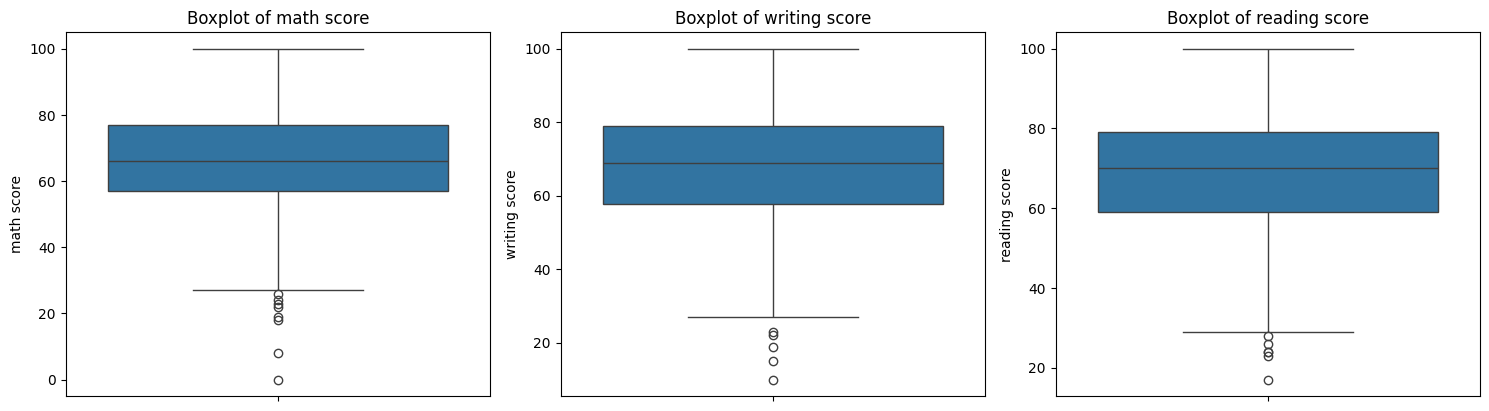

In [ ]:
# Cek semua kolom numerik dengan boxplot
# untuk Menampilkan Outlier pada Data Numerik.
numerical_cols = ['math score', 'writing score', 'reading score']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=insu_df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Menangani Outlier
numeric_df = insu_df.select_dtypes(include=['number']) # Select only numerical columns
Q1 = numeric_df.quantile(0.25) # Calculate quantiles on the numerical DataFrame
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
insu_df = insu_df[~((insu_df[numeric_df.columns] < (Q1 - 1.5 * IQR)) | (insu_df[numeric_df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
# Cek ukuran dataset setelah kita drop outliers
insu_df.shape

(988, 8)

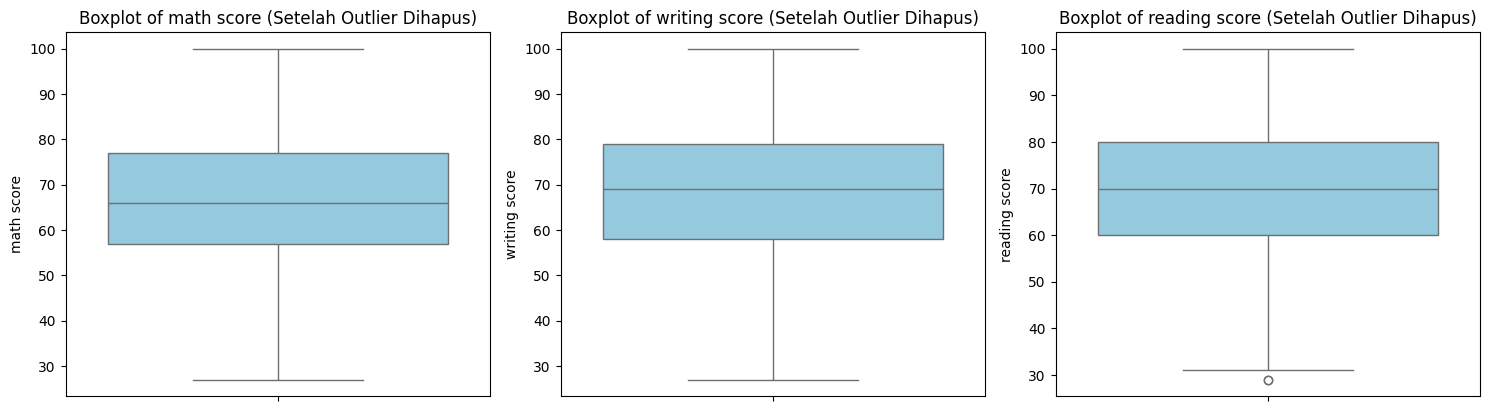

In [ ]:
# Menampilkan hasil setelah Outlier.
# Pilih kolom numerik
numerical_cols = ['math score', 'writing score', 'reading score']

# Buat boxplot untuk masing-masing kolom numerik
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=insu_df[col], color='skyblue')
    plt.title(f"Boxplot of {col} (Setelah Outlier Dihapus)")
    plt.tight_layout()

plt.show()

 **Exploratory Data Analysis - Univariate Analysis**

In [ ]:
# Membagi menjadi 2 data kolom yaitu Numerik dan Kategori.
num_features = ['math score', 'writing score', 'reading score']
cat_features = ['parental level of education','race/ethnicity','test preparation course','lunch','gender']

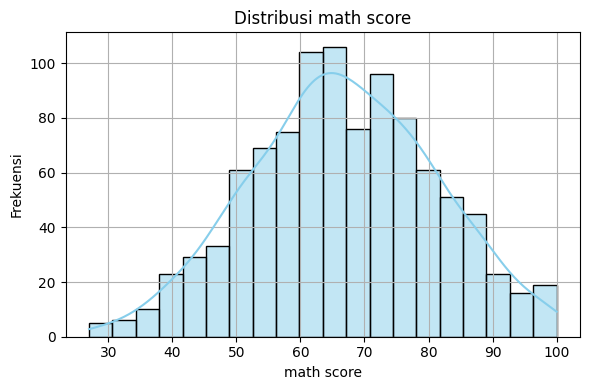

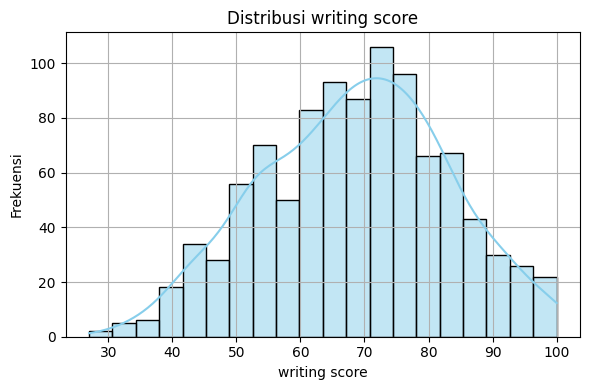

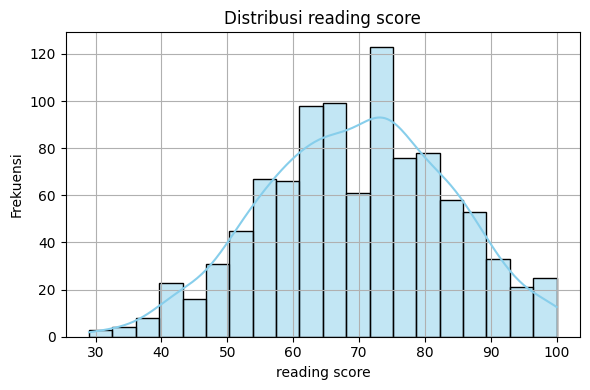

In [ ]:
#  Distribusi kolom numerik
# Loop untuk membuat plot distribusi tiap kolom numerik
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(insu_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

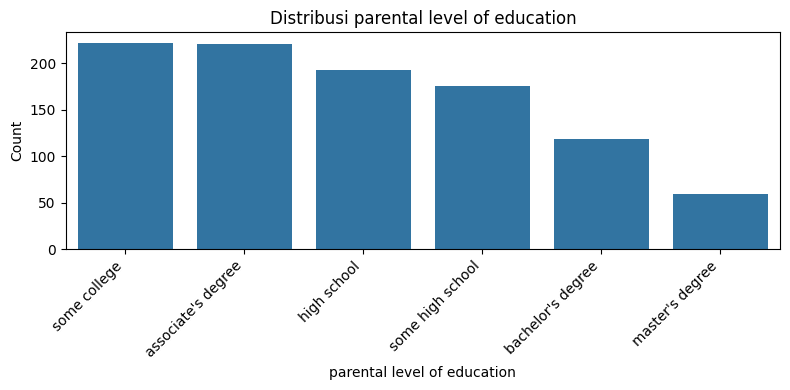

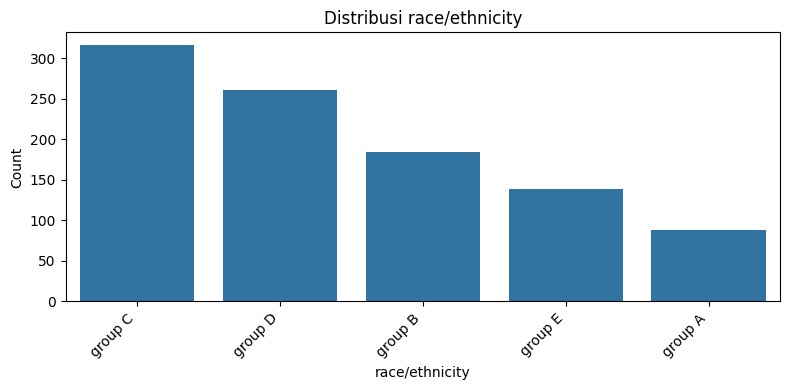

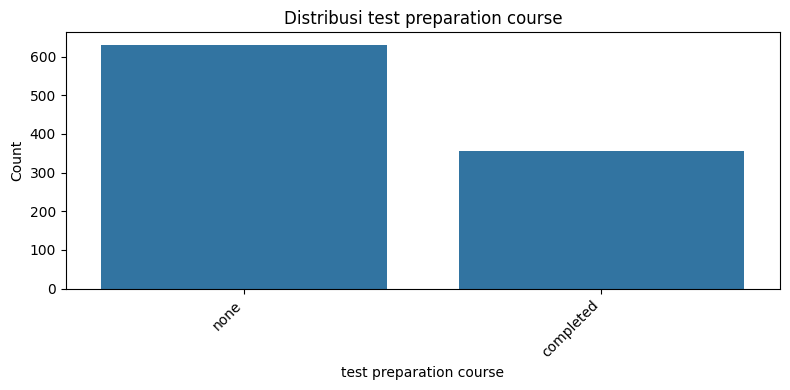

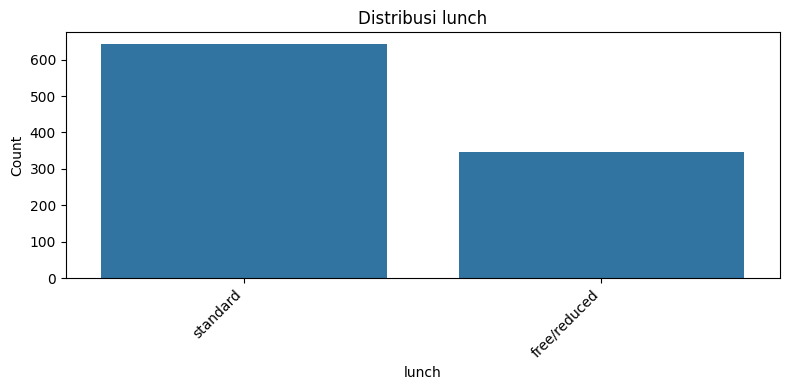

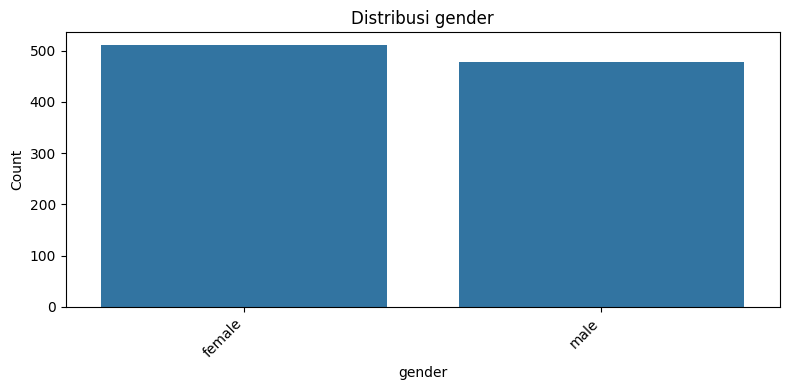

In [ ]:
# Pastikan semua label kategori terlihat
for col in cat_features:
    plt.figure(figsize=(8, 4))  # bisa disesuaikan sesuai panjang label
    sns.countplot(data=insu_df, x=col, order=insu_df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')  # putar label biar muat & rapi
    plt.tight_layout()
    plt.show()


==== Ringkasan untuk fitur: parental level of education ====
                             jumlah sampel  persentase (%)
parental level of education                               
some college                           222            22.5
associate's degree                     221            22.4
high school                            193            19.5
some high school                       175            17.7
bachelor's degree                      118            11.9
master's degree                         59             6.0


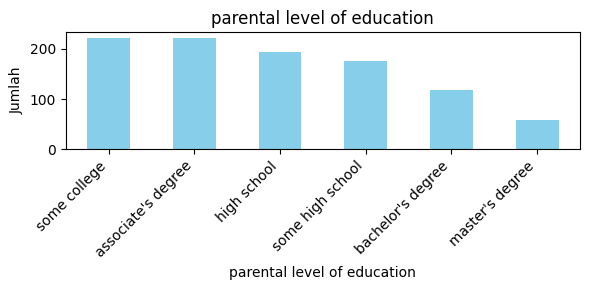


==== Ringkasan untuk fitur: race/ethnicity ====
                jumlah sampel  persentase (%)
race/ethnicity                               
group C                   316            32.0
group D                   261            26.4
group B                   184            18.6
group E                   139            14.1
group A                    88             8.9


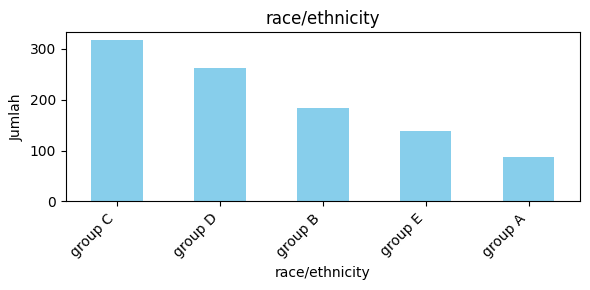


==== Ringkasan untuk fitur: test preparation course ====
                         jumlah sampel  persentase (%)
test preparation course                               
none                               631            63.9
completed                          357            36.1


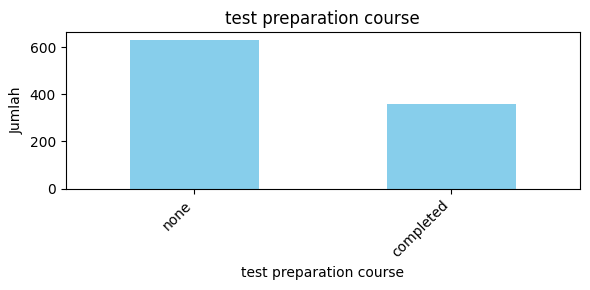


==== Ringkasan untuk fitur: lunch ====
              jumlah sampel  persentase (%)
lunch                                      
standard                643            65.1
free/reduced            345            34.9


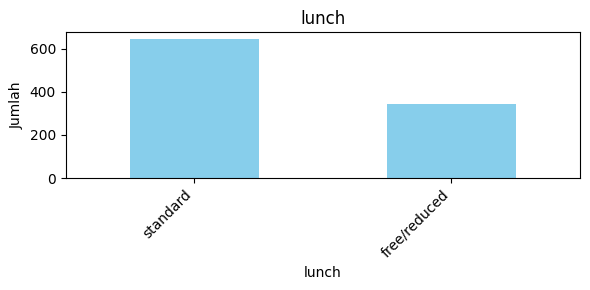


==== Ringkasan untuk fitur: gender ====
        jumlah sampel  persentase (%)
gender                               
female            510            51.6
male              478            48.4


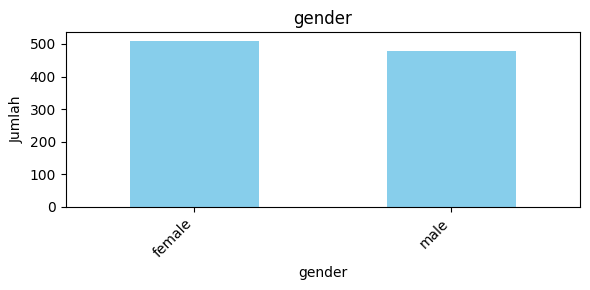

In [ ]:
# Loop untuk setiap fitur kategorikal
for feature in cat_features:
    print(f"\n==== Ringkasan untuk fitur: {feature} ====")

    count = insu_df[feature].value_counts()
    percent = 100 * insu_df[feature].value_counts(normalize=True)

    df1 = pd.DataFrame({
        'jumlah sampel': count,
        'persentase (%)': percent.round(1)
    })

    print(df1)

    # Visualisasi bar chart
    count.plot(kind='bar', title=feature, figsize=(6, 3), color='skyblue')
    plt.ylabel('Jumlah')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

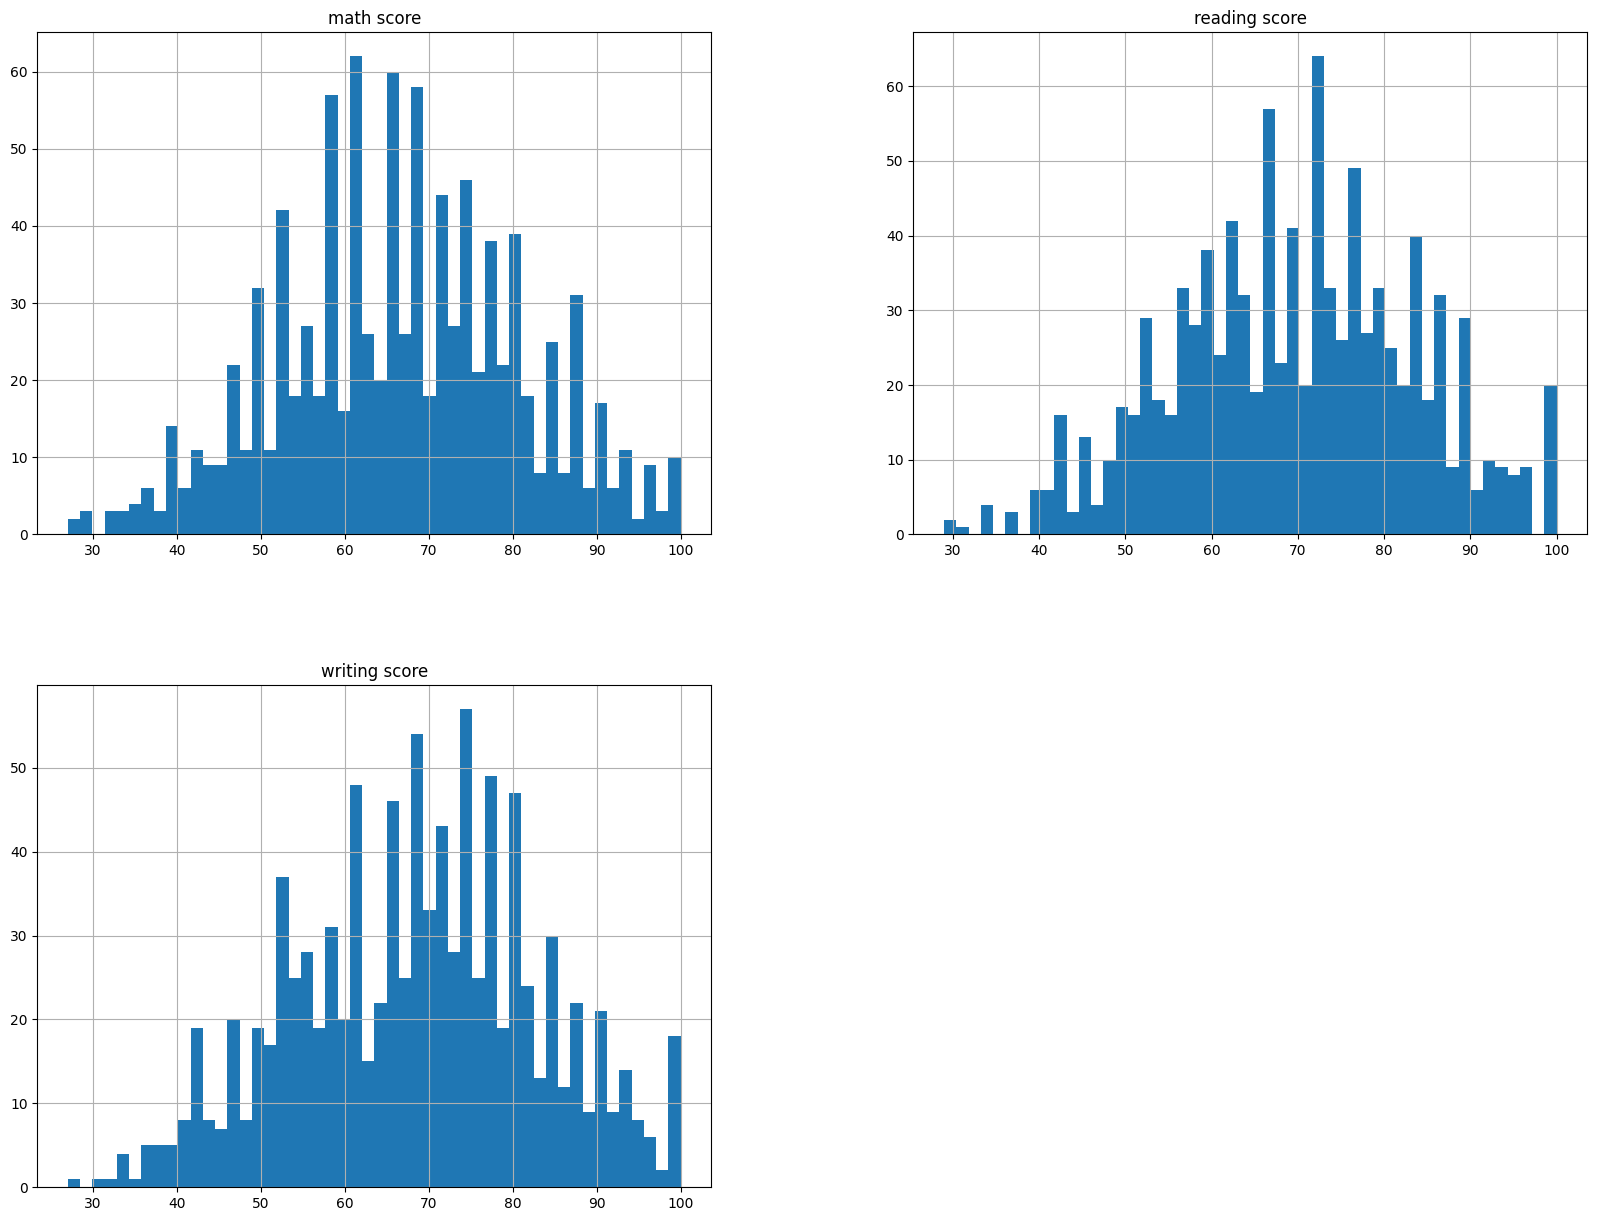

In [ ]:
insu_df.hist(bins=50, figsize=(20,15))
plt.show()

 **Exploratory Data Analysis - Multivariate Analysis**

<ipython-input-90-37eb144fc6da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insu_df, x=col, y='math score', palette='Set2')


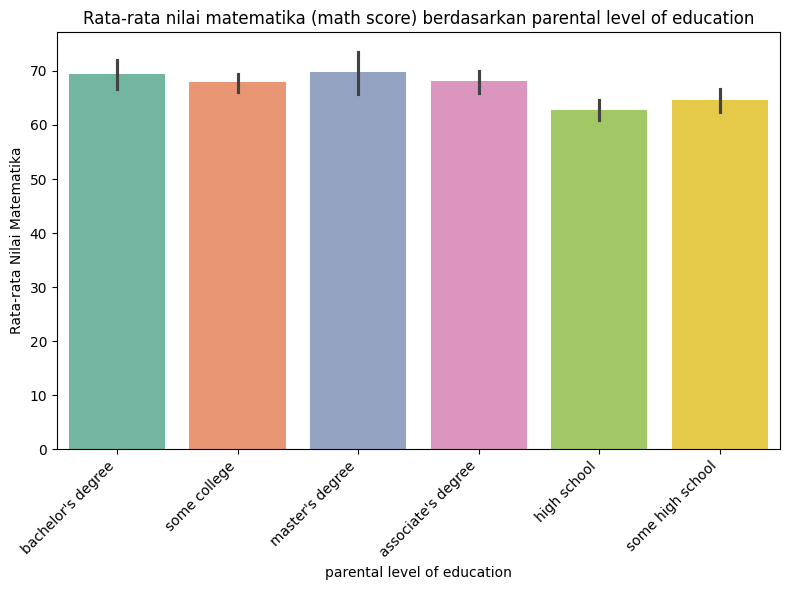

<ipython-input-90-37eb144fc6da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insu_df, x=col, y='math score', palette='Set2')


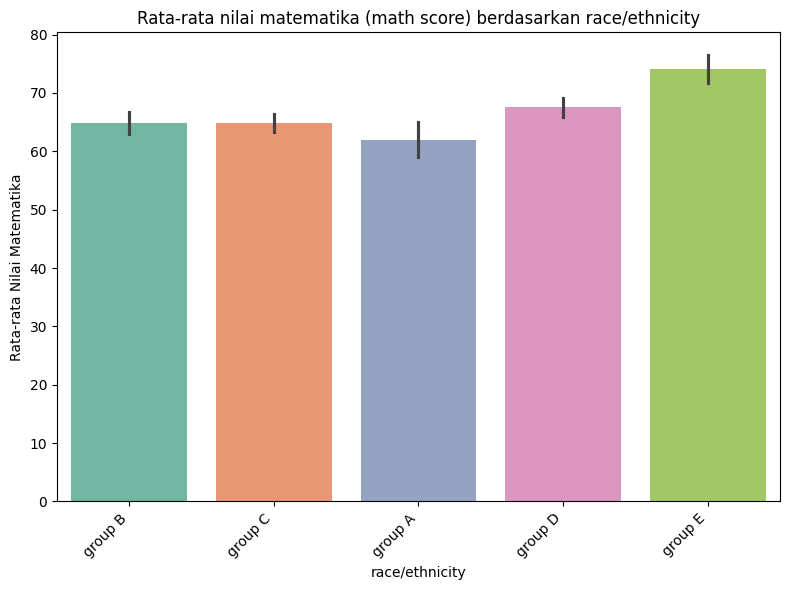

<ipython-input-90-37eb144fc6da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insu_df, x=col, y='math score', palette='Set2')


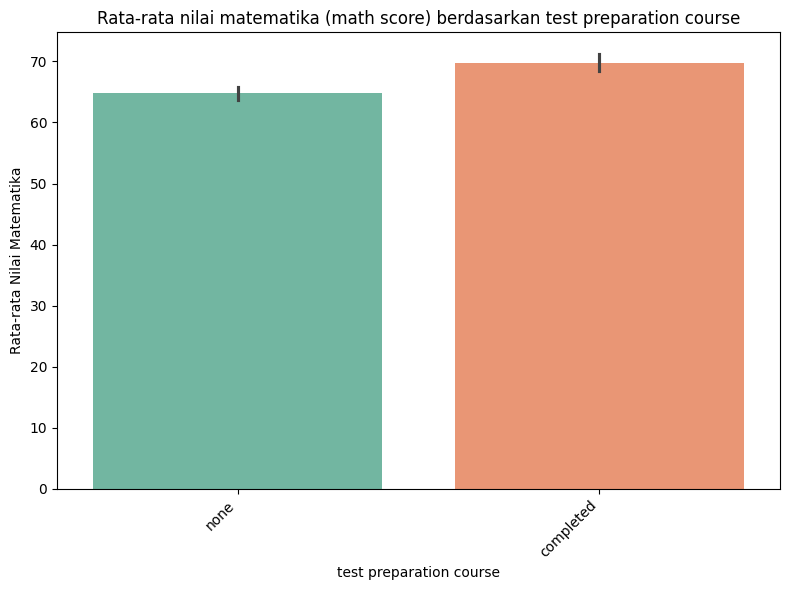

<ipython-input-90-37eb144fc6da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insu_df, x=col, y='math score', palette='Set2')


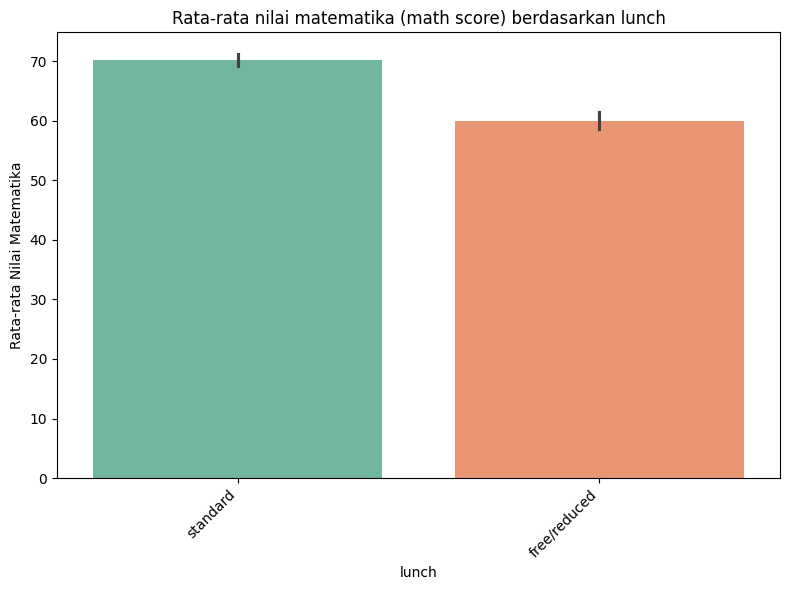

<ipython-input-90-37eb144fc6da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insu_df, x=col, y='math score', palette='Set2')


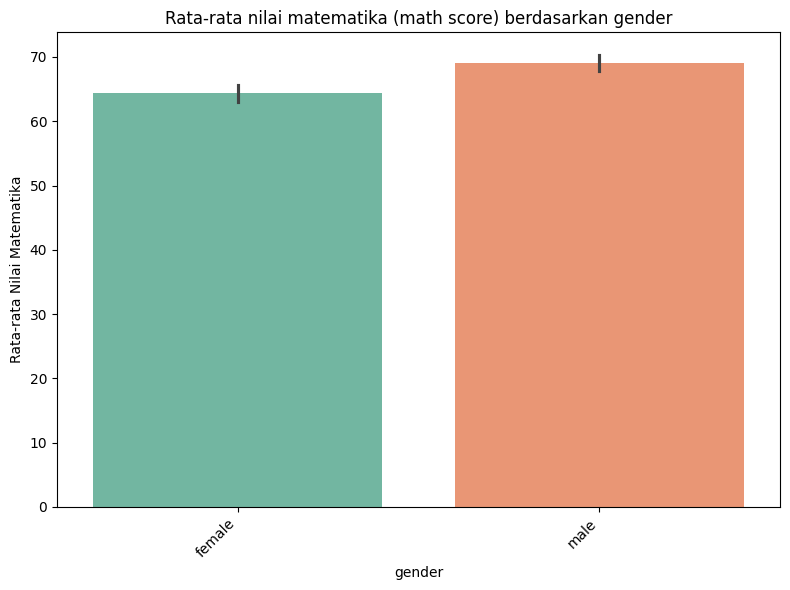

In [ ]:
# Boxplot kolom math score terhadap fitur kategori
for col in cat_features:
    plt.figure(figsize=(8, 6))  # Ukuran figure yang lebih proporsional
    sns.barplot(data=insu_df, x=col, y='math score', palette='Set2')
    plt.title(f'Rata-rata nilai matematika (math score) berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Rata-rata Nilai Matematika')  # Perbaikan label sumbu y
    plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar lebih mudah dibaca
    plt.tight_layout()
    plt.show()

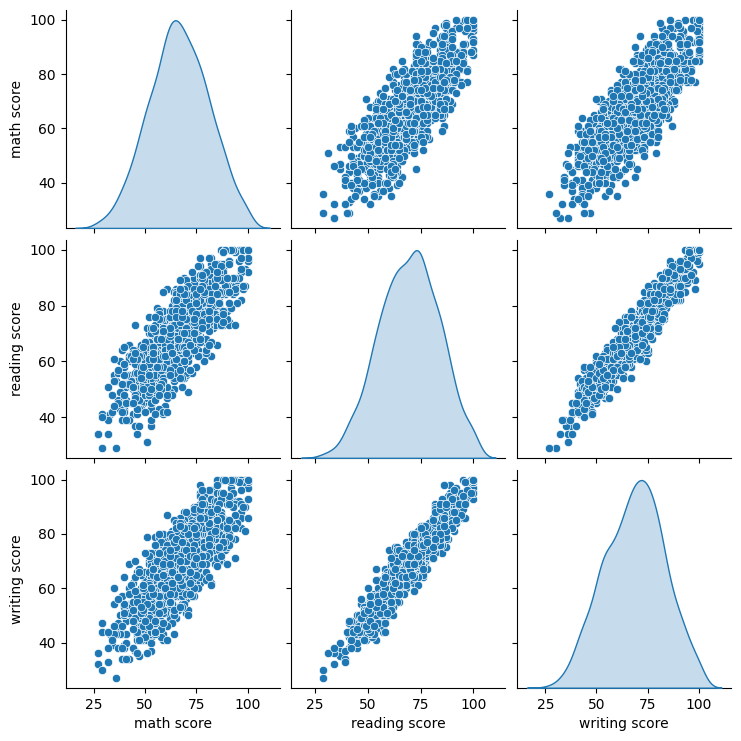

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(insu_df, diag_kind = 'kde')

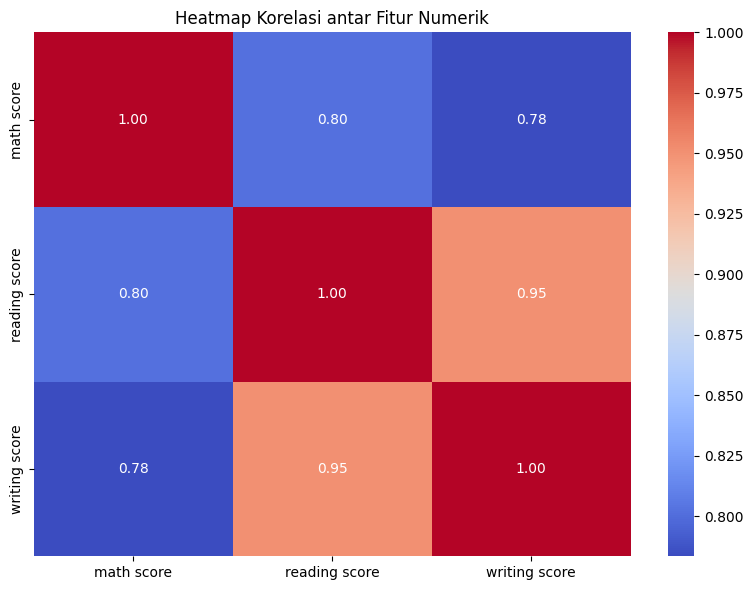

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(insu_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

**Data Preparation**

In [ ]:
# Melakukan Standarisasi dan menimpa kolom asli
df = insu_df.copy()

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    0.373174       0.168406       0.

In [ ]:
# One-Hot Encoding per kolom, gabung ke DataFrame
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')], axis=1)
df = pd.concat([df, pd.get_dummies(df['lunch'], prefix='lunch')], axis=1)
df = pd.concat([df, pd.get_dummies(df['parental level of education'], prefix='parental level of education')], axis=1)
df = pd.concat([df, pd.get_dummies(df['test preparation course'], prefix='test preparation course')], axis=1)
df = pd.concat([df, pd.get_dummies(df['race/ethnicity'], prefix='race/ethnicity')], axis=1)
# Drop kolom aslinya (karena sudah di-encode)
df.drop(['test preparation course','race/ethnicity','parental level of education','gender','lunch'], axis=1, inplace=True)

# Tampilkan hasil
df.head()


,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0.373174,0.168406,0.374241,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
1,0.164871,1.453233,1.338567,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False
2,1.622992,1.810130,1.682969,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False
3,-1.362684,-0.902283,-1.692172,False,True,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False
4,0.650912,0.596682,0.443121,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False


In [ ]:
pca = PCA(n_components=3, random_state=42)
pca.fit(df[['math score', 'writing score', 'reading score']])
princ_comp = pca.transform(df[['math score', 'writing score', 'reading score']])
print(pca)

PCA(n_components=3, random_state=42)


In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.898, 0.086, 0.016])

In [ ]:
print(df)

     math score  reading score  writing score  gender_female  gender_male  \
0      0.373174       0.168406       0.374241           True        False   
1      0.164871       1.453233       1.338567           True        False   
2      1.622992       1.810130       1.682969           True        False   
3     -1.362684      -0.902283      -1.692172          False         True   
4      0.650912       0.596682       0.443121          False         True   
..          ...            ...            ...            ...          ...   
995    1.484123       2.095647       1.820730           True        False   
996   -0.321169      -1.045042      -0.934487          False         True   
997   -0.529472       0.097027      -0.245683           True        False   
998    0.095437       0.596682       0.580882           True        False   
999    0.720346       1.167716       1.200806           True        False   

     lunch_free/reduced  lunch_standard  \
0                 False         

In [ ]:
# Fitur dan Target
X = df.drop(['reading score'],axis =1)
y = df["reading score"]

In [ ]:
# Split Data
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 988
Total jumlah sample pada train dataset: 790
Total jumlah sample pada test dataset: 198


**Model Development**

In [ ]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'],
                      columns=['KNN', 'RandomForest', 'Boosting','SVM'])

**K-Nearest Neighborn**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
df_models.loc['Train MSE','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [ ]:
# Prediksi di training set
y_train_pred = knn.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.1228
Test MSE: 0.1416


**Random Forest**

In [ ]:
# buat model prediksi
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

df_models.loc['Train MSE','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

In [ ]:
# Prediksi di training set
y_train_pred = rf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.0142
Test MSE: 0.0987


**Boosting**

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
df_models.loc['Train MSE','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
# Prediksi di training set
y_train_pred = boosting.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = boosting.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.0976
Test MSE: 0.1043


**SVM**

In [ ]:
svm= SVR()
svm.fit(X_train, y_train)
df_models.loc['Train MSE','SVM'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

In [ ]:
# Prediksi di training set
y_train_pred = svm.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = svm.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.0537
Test MSE: 0.0995


In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['Train', 'Test'], index=['KNN','RF','Boosting','SVM'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting,'SVM':svm}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'Train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'Test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 # Panggil mse
mse

,Train,Test
KNN,0.122781,0.141566
RF,0.014201,0.098689
Boosting,0.097585,0.104258
SVM,0.05368,0.099477


In [ ]:
mse

,Train,Test
KNN,0.122781,0.141566
RF,0.014201,0.098689
Boosting,0.097585,0.104258
SVM,0.05368,0.099477


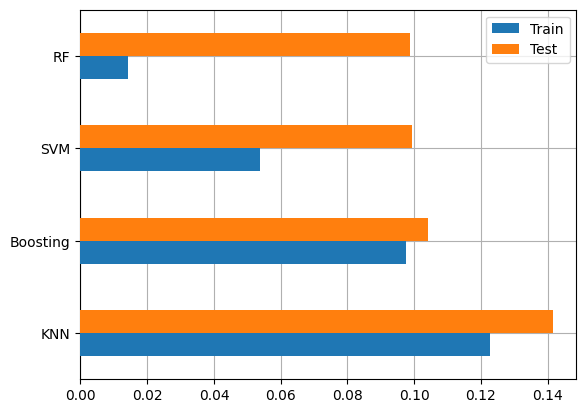

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


In [ ]:
# Contoh: prediksi dari model-model
pred_1 = knn.predict(X_test)         # KNN
pred_2 = rf.predict(X_test)          # Random Forest
pred_3 = boosting.predict(X_test)
pred_4 = svm.predict(X_test)

# Gabungkan semua hasil ke dalam DataFrame
df_prediksi = pd.DataFrame({
    'y_true': y_test,
    'prediksi_KNN': pred_1,
    'prediksi_RF': pred_2,
    'prediksi_Boosting': pred_3,
    'prediksi_svm': pred_4
})

# Tambahkan index asli untuk pelacakan (optional)
df_prediksi.index.name = 'index_sample'

# Tampilkan beberapa baris untuk dicek
print(df_prediksi.sample(2).sort_index())


                y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting  \
index_sample                                                           
819           1.524613      0.867923     1.330937           1.207371   
879           0.453923      0.325440     0.097027           0.174020   

              prediksi_svm  
index_sample                
819               1.122141  
879               0.257903  
